# Supervised Learning Algorithms - Logistic Regression (Univariant)
Implement logistic regression and test it using any dataset which will be given to you. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Print the confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc. Analyze and write the inference.

#### Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


#### Loading Dataset

In [2]:
data = pd.read_csv(r'./Datasets/diabetes2.csv')
data.drop(["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"], inplace = True, axis = 1)
data.head()

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1


#### Splitting Dataset

In [3]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


#### Training the Logistics Regression model on the testing data

In [4]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [5]:
print('Predicted Value')
y_pred = logreg.predict(x_test)
print(y_pred[:10])
print('Actual Value')
print(y_test[:10])
print('Accuracy of logistic regression classifier on testing dataset: {:.2f}'.format(logreg.score(x_test, y_test)))


Predicted Value
[0 0 0 1 0 0 0 1 0 1]
Actual Value
661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
Name: Outcome, dtype: int64
Accuracy of logistic regression classifier on testing dataset: 0.69


C:\Users\Ayush Jain\AppData\Local\Temp\ipykernel_16528\4030880366.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:10])


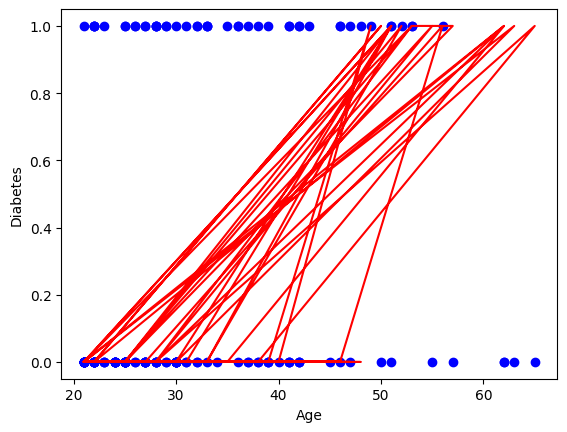

In [6]:
plt.scatter(x_test,y_test, color = 'b')
plt.plot(x_test,logreg.predict(x_test),color = 'r')
plt.xlabel("Age")
plt.ylabel("Diabetes")
plt.show()

#### Confusion Matrix and metrics

Accuracy :  0.6883116883116883
Precison  :  0.6372854962783021
Recall Score :  0.6883116883116883
F1 Score :  0.6281484054890821
MCC :  0.11519005465595214


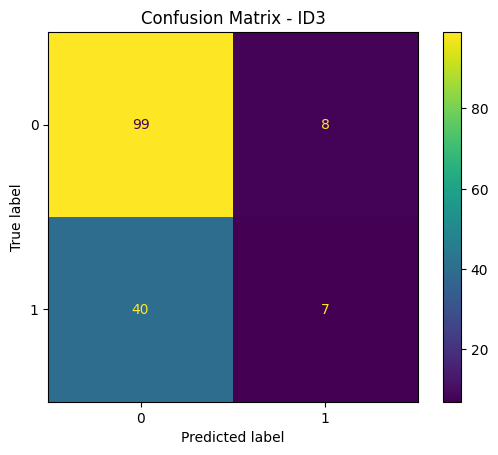

In [7]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy : ' , metrics.accuracy_score(y_test, y_pred))
print('Precison  : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.title('Confusion Matrix - ID3')
plt.show()